In this notebook, I will compare several binary classification models using a simulated dataset.

The data is simulated using scikit-learn's ```make_classification```. First, the models will be trained and tested on a simple dataset with 2 relevant features. Later, they will be trained and tested on a more complex dataset with both redundant and repeated features without any feature engineering. ```make_classification``` documentation can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html).

I will try the following scikit-learn classifiers (click on the model name for documentation): [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html),
[DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html),
[LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html),
[KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html),
[RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html), [GradientBoostingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html).

I will also add multiplayer perceptrons in Keras and PyTorch and evaluate their performances.

In [1]:
# create simulated data with 2 features
from sklearn.datasets import make_classification

X, Y = make_classification(n_samples = 1000,
                           n_features = 2,
                           n_informative = 2,
                           n_redundant = 0,
                           n_clusters_per_class = 1,
                           random_state = 47)

In [2]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 47)

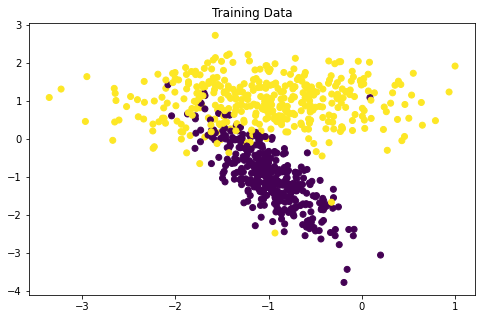

In [3]:
# plot the training data
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.scatter(X_train[:,0], X_train[:,1], c = Y_train)
plt.title('Training Data')
plt.show()

In [4]:
# import the classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [5]:
# fit logistic regression with default parameters
log_reg = LogisticRegression()
log_reg.fit(X_train, Y_train)
# obtain prediction accuracy on test data 
log_reg.score(X_test, Y_test)

0.928

In [6]:
# fit the decision tree classifier with default parameters
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, Y_train)
# obtain prediction accuracy on test data
dt_clf.score(X_test, Y_test)

0.944

In [7]:
# fit linear SVC with default parameters
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
# obtain prediction accuracy on test data
linear_svc.score(X_test, Y_test)

0.928

In [8]:
# fit K-neighbors classifier with default parameters
kn_clf = KNeighborsClassifier()
kn_clf.fit(X_train, Y_train)
# obtain prediction accuracy on the test data
kn_clf.score(X_test, Y_test)

0.952

In [9]:
# fit the random forrest classifier with default parameters
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, Y_train)
# obtain prediction accuracy on the test data
rf_clf.score(X_test, Y_test)

0.952

In [10]:
# fit the gradient boosting classifier with default parameters
gb_clf = GradientBoostingClassifier()
gb_clf.fit(X_train, Y_train)
# obtain prediction accuracy on the test data
gb_clf.score(X_test, Y_test)

0.952

In [11]:
%%time
# create a binary classification model in Keras
from keras.models import Sequential
from keras.layers import Dense

# three layer model with 2 feature input and sigmoid output
model = Sequential([
    Dense(30, input_shape=(2,), activation = 'relu'),
    Dense(30, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])
# compile the model using binary crossentropy as the loss function and
# binary accuracy as the evaluation metric
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])
model.fit(X_train, Y_train, epochs = 50)
# evaluate using the test data
model.evaluate(X_test, Y_test)

Epoch 1/50
24/24 [==============================] - 0s 1ms/step - loss: 0.6049 - binary_accuracy: 0.8053
Epoch 2/50
24/24 [==============================] - 0s 1ms/step - loss: 0.4703 - binary_accuracy: 0.8907
Epoch 3/50
24/24 [==============================] - 0s 1ms/step - loss: 0.3624 - binary_accuracy: 0.9067
Epoch 4/50
24/24 [==============================] - 0s 942us/step - loss: 0.2863 - binary_accuracy: 0.9120
Epoch 5/50
24/24 [==============================] - 0s 956us/step - loss: 0.2414 - binary_accuracy: 0.9227
Epoch 6/50
24/24 [==============================] - 0s 956us/step - loss: 0.2225 - binary_accuracy: 0.9240
Epoch 7/50
24/24 [==============================] - 0s 956us/step - loss: 0.2115 - binary_accuracy: 0.9267
Epoch 8/50
24/24 [==============================] - 0s 999us/step - loss: 0.2070 - binary_accuracy: 0.9307
Epoch 9/50
24/24 [==============================] - 0s 916us/step - loss: 0.2031 - binary_accuracy: 0.9293
Epoch 10/50
24/24 [========================

[0.1484384387731552, 0.9480000138282776]

In [12]:
# create a binary classification model in PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F

class TorchBinaryClassifier(nn.Module):
    def __init__(self):
        super(TorchBinaryClassifier, self).__init__()
        # 3 layer NN similar to the one done in Keras
        self.fc1 = nn.Linear(2, 30)
        self.fc2 = nn.Linear(30, 30)
        self.fc3 = nn.Linear(30, 1)
        # sigmoid layer for classification
        self.sig = nn.Sigmoid()
        
    def forward(self, x):
        # apply ReLU after each of the first two layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        # apply sigmoid function before returning the value
        x = self.sig(x)
        
        return x
    
net = TorchBinaryClassifier()

In [13]:
# specify loss and optimizer
import torch.optim as optim

criterion = nn.BCELoss()
optimizer = optim.Adam(net.parameters())

In [14]:
# speficy train and test data
from torch.utils.data import TensorDataset, DataLoader

X_train_tensor = torch.from_numpy(X_train).float()
Y_train_tensor = torch.from_numpy(Y_train).float().squeeze()

X_test_tensor = torch.from_numpy(X_test).float()
Y_test_tensor = torch.from_numpy(Y_test).float()

trainset = TensorDataset(X_train_tensor, Y_train_tensor)
testset = TensorDataset(X_test_tensor, Y_test_tensor)

train_loader = DataLoader(trainset)
test_loader = DataLoader(testset)

In [15]:
%%time
# train the model
net.train()

for epoch in range(50):
    # zero the running loss for the epch
    running_loss = 0.0
    
    for data, target in train_loader:
        optimizer.zero_grad()
        output = net(data)
        loss = criterion(output, target.view(-1,1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f'Epoch: {epoch + 1}, training loss: {running_loss/len(train_loader.dataset)}')

Epoch: 1, training loss: 0.27650618027737556
Epoch: 2, training loss: 0.1953600542081161
Epoch: 3, training loss: 0.184683853238205
Epoch: 4, training loss: 0.17725519243805804
Epoch: 5, training loss: 0.17142452279597153
Epoch: 6, training loss: 0.1668964824806705
Epoch: 7, training loss: 0.16349553666847594
Epoch: 8, training loss: 0.16051115735853091
Epoch: 9, training loss: 0.1581282734264314
Epoch: 10, training loss: 0.15598464563467435
Epoch: 11, training loss: 0.15419547791074667
Epoch: 12, training loss: 0.1530026618034684
Epoch: 13, training loss: 0.15169705597827912
Epoch: 14, training loss: 0.1509923201266465
Epoch: 15, training loss: 0.150272957791192
Epoch: 16, training loss: 0.14952029169768685
Epoch: 17, training loss: 0.14892721308751242
Epoch: 18, training loss: 0.14831143824210252
Epoch: 19, training loss: 0.14812901373083287
Epoch: 20, training loss: 0.14739422784338543
Epoch: 21, training loss: 0.14710175277776033
Epoch: 22, training loss: 0.14653875932039287
Epoch:

In [16]:
# evaluate the model
import numpy as np

net.eval()

test_loss = 0.0
correct_predictions = 0

for data, target in test_loader:
    output = net(data)
    loss = criterion(output, target.view(-1,1))
    test_loss += loss.item()
    predicted = np.round(output.detach().numpy().squeeze())
    actual = target.numpy().squeeze()
    if predicted == actual:
        correct_predictions += 1
    
print(f'Loss: {test_loss/len(test_loader.dataset)}')
print(f'Accuracy: {correct_predictions/len(test_loader.dataset)}')

Loss: 0.1421513410023848
Accuracy: 0.948


All models achieved above 90% accuracy. The PyTorch MLP required by far the most lines of code and was the slowest.

Now I will test the same models on a dataset with 4 features, 3 of which are informative, and one is a random linear combination of the others.

In [17]:
X_2, Y_2 = make_classification(n_samples = 1000,
                           n_features = 4,
                           n_informative = 3,
                           n_redundant = 1,
                           n_clusters_per_class = 1,
                           random_state = 47)

X_2_train, X_2_test, Y_2_train, Y_2_test = train_test_split(X_2, Y_2, 
                                                            test_size = 0.25,
                                                            random_state = 47)

<IPython.core.display.Javascript object>


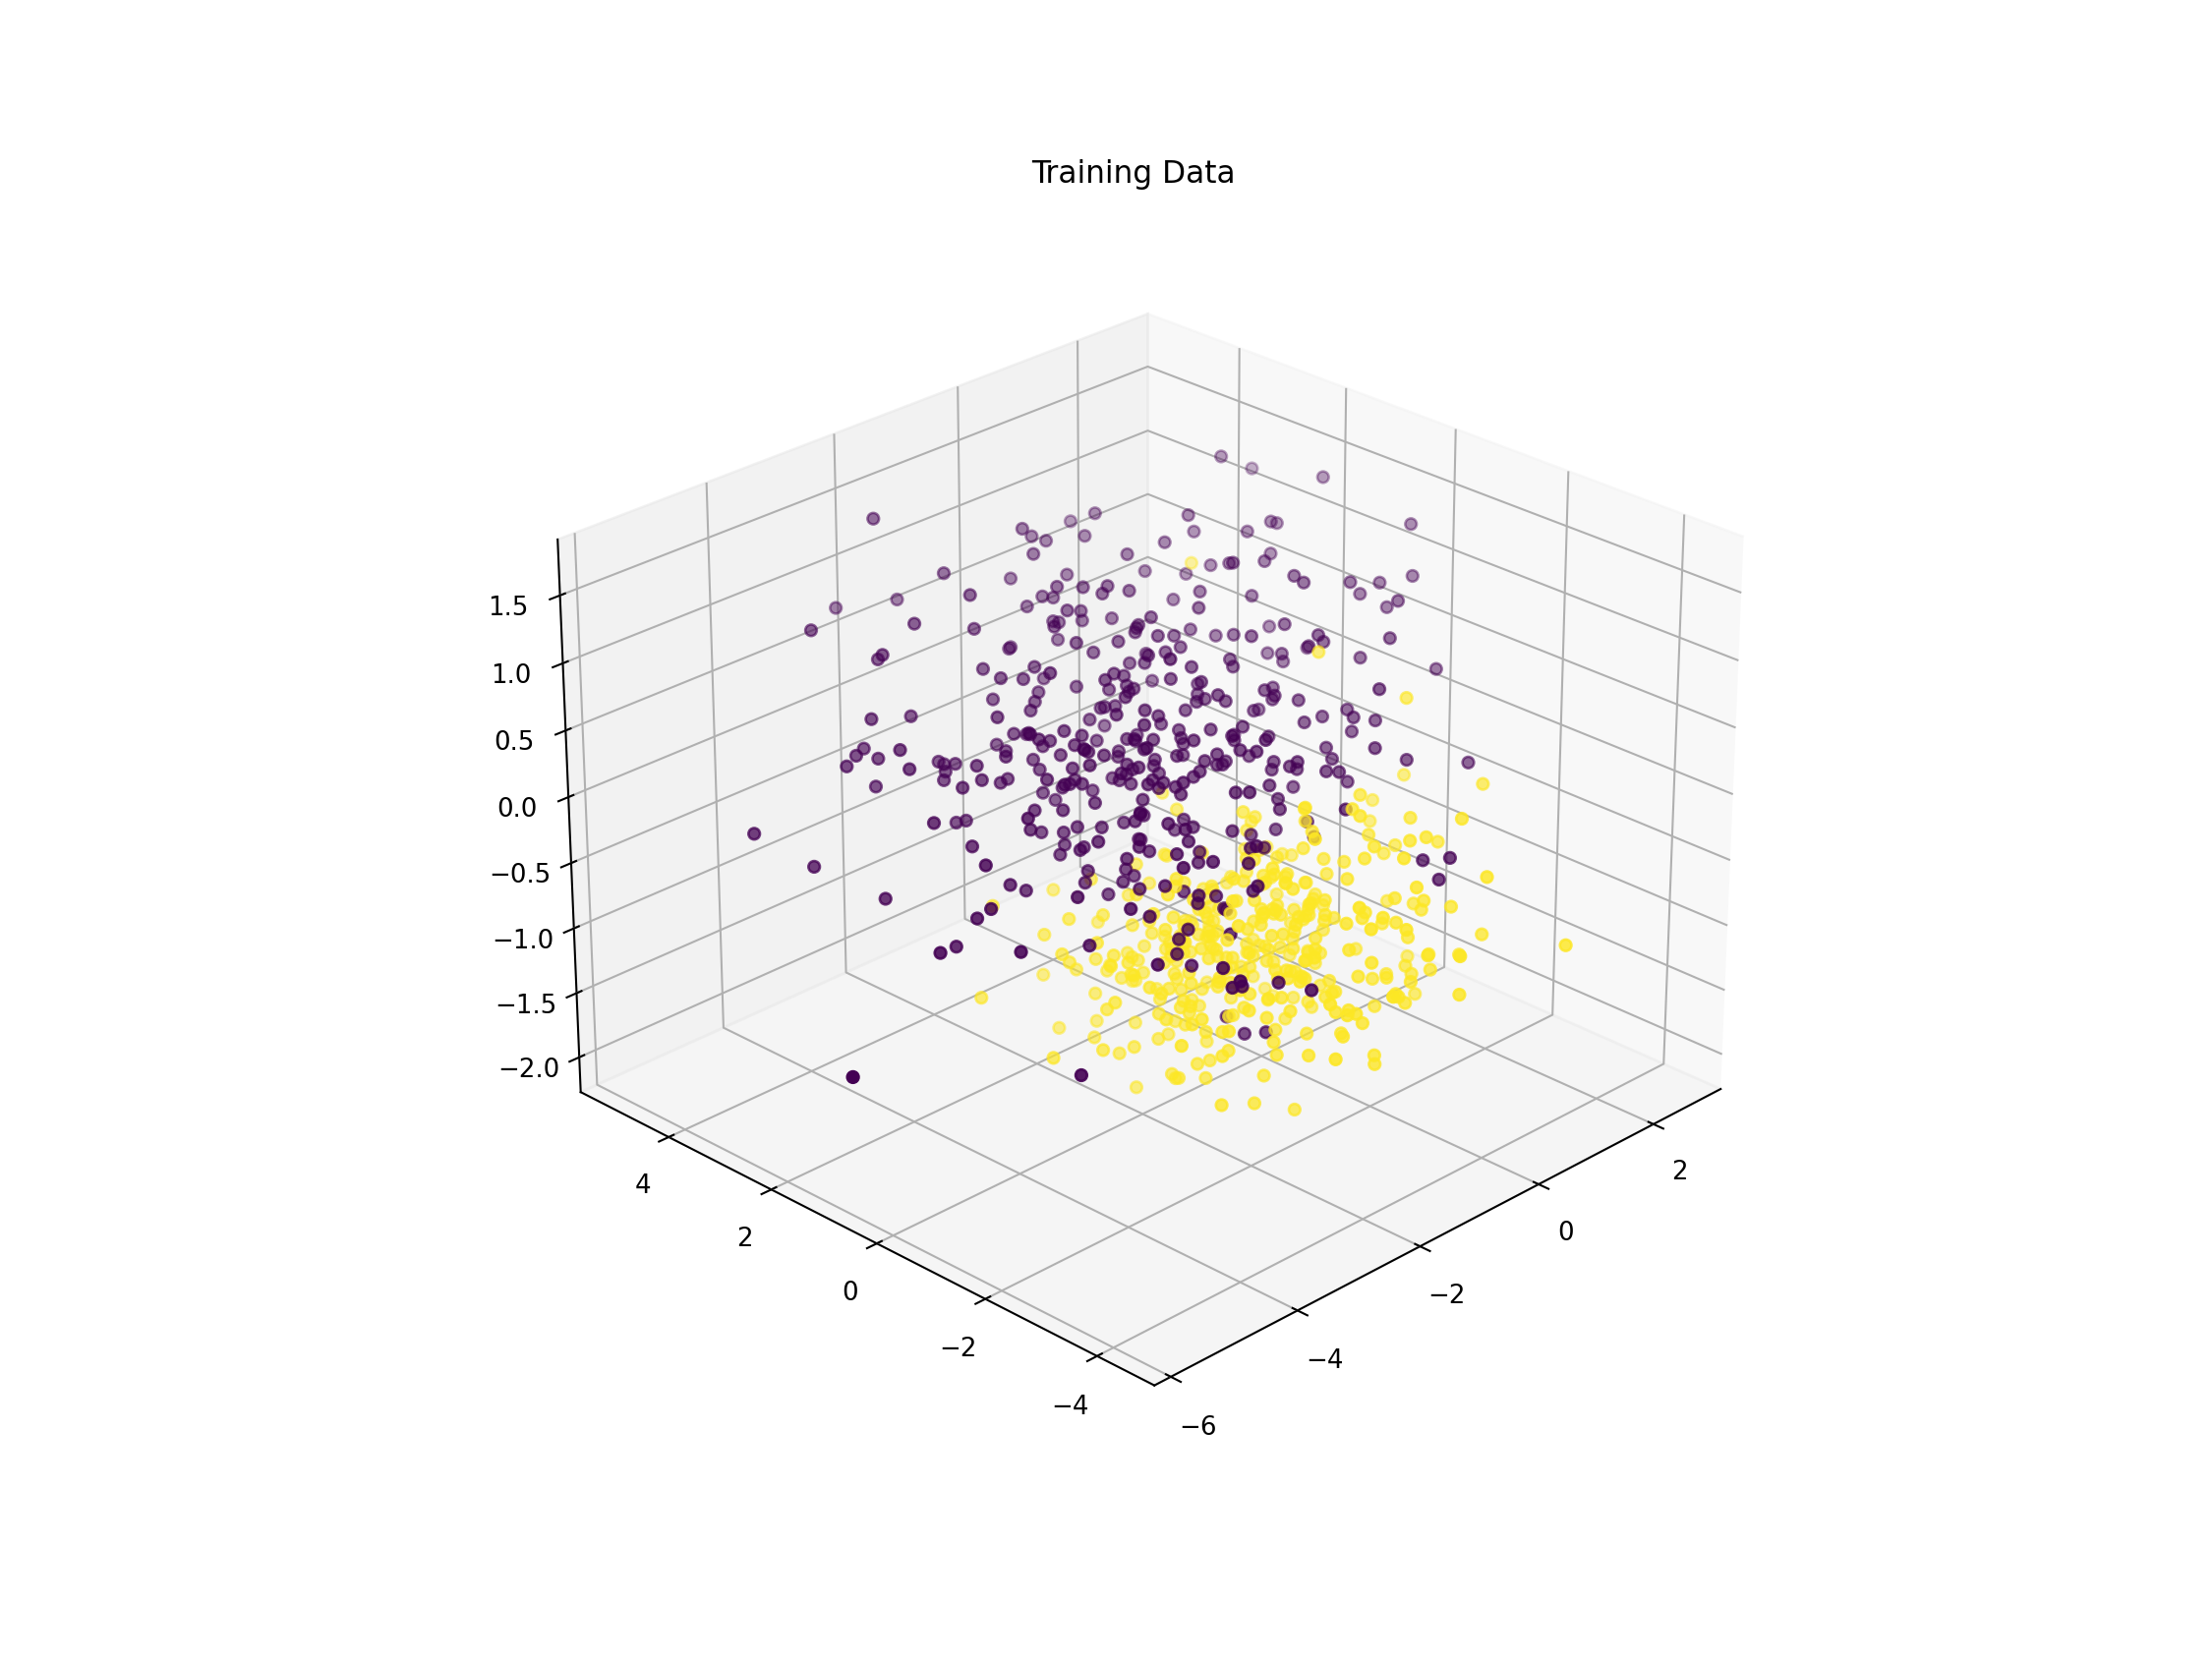

In [18]:
# display the new classes in terms of the first 3 features using an interactive 3d plot
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(X_2_train[:,0], X_2_train[:,1], X_2_train[:,2], c = Y_2_train)
plt.title('Training Data')
plt.show()

In [19]:
# fit and evaluate logistic regression
log_reg.fit(X_2_train, Y_2_train)
log_reg.score(X_2_test, Y_2_test)

0.928

In [20]:
# fit and evaluate the decision tree classifier
dt_clf.fit(X_2_train, Y_2_train)
dt_clf.score(X_2_test, Y_2_test)

0.912

In [21]:
# fit and evaluate linear SVC
linear_svc.fit(X_2_train, Y_2_train)
linear_svc.score(X_2_test, Y_2_test)

0.928

In [22]:
# fit and evaluate K-neighbors classifier
kn_clf.fit(X_2_train, Y_2_train)
kn_clf.score(X_2_test, Y_2_test)

0.944

In [23]:
# fit and evaluate the random forrest classifier
rf_clf.fit(X_2_train, Y_2_train)
rf_clf.score(X_2_test, Y_2_test)

0.944

In [24]:
# fit and evaluate the gradient boosting classifier
gb_clf.fit(X_2_train, Y_2_train)
gb_clf.score(X_2_test, Y_2_test)

0.948

In [25]:
%%time
# three layer model with 4 feature input and sigmoid output
model_2 = Sequential([
    Dense(30, input_shape=(4,), activation = 'relu'),
    Dense(30, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])
# compile the model using binary crossentropy as the loss function and
# binary accuracy as the evaluation metric
model_2.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])
model_2.fit(X_2_train, Y_2_train, epochs = 50)
# evaluate using the test data
model_2.evaluate(X_2_test, Y_2_test)

Epoch 1/50
24/24 [==============================] - 0s 914us/step - loss: 0.4816 - binary_accuracy: 0.8787
Epoch 2/50
24/24 [==============================] - 0s 997us/step - loss: 0.3451 - binary_accuracy: 0.9160
Epoch 3/50
24/24 [==============================] - 0s 914us/step - loss: 0.2556 - binary_accuracy: 0.9307
Epoch 4/50
24/24 [==============================] - 0s 1ms/step - loss: 0.2113 - binary_accuracy: 0.9293
Epoch 5/50
24/24 [==============================] - 0s 997us/step - loss: 0.1933 - binary_accuracy: 0.9307
Epoch 6/50
24/24 [==============================] - 0s 956us/step - loss: 0.1879 - binary_accuracy: 0.9307
Epoch 7/50
24/24 [==============================] - 0s 914us/step - loss: 0.1811 - binary_accuracy: 0.9320
Epoch 8/50
24/24 [==============================] - 0s 956us/step - loss: 0.1773 - binary_accuracy: 0.9307
Epoch 9/50
24/24 [==============================] - 0s 916us/step - loss: 0.1762 - binary_accuracy: 0.9267
Epoch 10/50
24/24 [====================

[0.15313029289245605, 0.9520000219345093]

In [26]:
# create another binary classification model in PyTorch
class TorchBinaryClassifier_2(nn.Module):
    def __init__(self):
        super(TorchBinaryClassifier_2, self).__init__()
        # 3 layer NN similar to the one done in Keras
        self.fc1 = nn.Linear(4, 30)
        self.fc2 = nn.Linear(30, 30)
        self.fc3 = nn.Linear(30, 1)
        # sigmoid layer for classification
        self.sig = nn.Sigmoid()
        
    def forward(self, x):
        # apply ReLU after each of the first two layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        # apply sigmoid function before returning the value
        x = self.sig(x)
        
        return x
    
net_2 = TorchBinaryClassifier_2()

In [27]:
# specify loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(net_2.parameters())

In [28]:
# speficy train and test data
X_2_train_tensor = torch.from_numpy(X_2_train).float()
Y_2_train_tensor = torch.from_numpy(Y_2_train).float().squeeze()

X_2_test_tensor = torch.from_numpy(X_2_test).float()
Y_2_test_tensor = torch.from_numpy(Y_2_test).float()

trainset_2 = TensorDataset(X_2_train_tensor, Y_2_train_tensor)
testset_2 = TensorDataset(X_2_test_tensor, Y_2_test_tensor)

train_loader_2 = DataLoader(trainset_2)
test_loader_2 = DataLoader(testset_2)

In [29]:
%%time
# train the model
net_2.train()

for epoch in range(50):
    # zero the running loss for the epch
    running_loss = 0.0
    
    for data, target in train_loader_2:
        optimizer.zero_grad()
        output = net_2(data)
        loss = criterion(output, target.view(-1,1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f'Epoch: {epoch + 1}, training loss: {running_loss/len(train_loader_2.dataset)}')

Epoch: 1, training loss: 0.2686367590767747
Epoch: 2, training loss: 0.1851959698444742
Epoch: 3, training loss: 0.17754168150499758
Epoch: 4, training loss: 0.1729623151084721
Epoch: 5, training loss: 0.1695694369591725
Epoch: 6, training loss: 0.16690297614698607
Epoch: 7, training loss: 0.16472115793696415
Epoch: 8, training loss: 0.16284949901476986
Epoch: 9, training loss: 0.1615450364894891
Epoch: 10, training loss: 0.1599557479826836
Epoch: 11, training loss: 0.15856220287734993
Epoch: 12, training loss: 0.15755771500072951
Epoch: 13, training loss: 0.15639815504974133
Epoch: 14, training loss: 0.15525202472267935
Epoch: 15, training loss: 0.1544026780644129
Epoch: 16, training loss: 0.15341437978514777
Epoch: 17, training loss: 0.15243362359697096
Epoch: 18, training loss: 0.15139987242847788
Epoch: 19, training loss: 0.15058056779714923
Epoch: 20, training loss: 0.1496277819528057
Epoch: 21, training loss: 0.1484914406412308
Epoch: 22, training loss: 0.14746217787331187
Epoch:

In [30]:
# evaluate the model
net_2.eval()

test_loss = 0.0
correct_predictions = 0

for data, target in test_loader_2:
    output = net_2(data)
    loss = criterion(output, target.view(-1,1))
    test_loss += loss.item()
    predicted = np.round(output.detach().numpy().squeeze())
    actual = target.numpy().squeeze()
    if predicted == actual:
        correct_predictions += 1
    
print(f'Loss: {test_loss/len(test_loader_2.dataset)}')
print(f'Accuracy: {correct_predictions/len(test_loader_2.dataset)}')

Loss: 0.14117940176919264
Accuracy: 0.952


All models achieved over 90% accuracy again.

For the next dataset, I will use 7 features broken down into 4 informative, 2 redundant (linear combinations of informative features), and 1 repeated (randomly chosen from the previous 6).

In [31]:
X_3, Y_3 = make_classification(n_samples = 1000,
                           n_features = 7,
                           n_informative = 4,
                           n_redundant = 2,
                           n_repeated = 1,
                           n_clusters_per_class = 1,
                           random_state = 47)

X_3_train, X_3_test, Y_3_train, Y_3_test = train_test_split(X_3, Y_3, 
                                                            test_size = 0.25,
                                                            random_state = 47)

In [32]:
# fit and evaluate logistic regression
log_reg.fit(X_3_train, Y_3_train)
log_reg.score(X_3_test, Y_3_test)

0.884

In [33]:
# fit and evaluate the decision tree classifier
dt_clf.fit(X_3_train, Y_3_train)
dt_clf.score(X_3_test, Y_3_test)

0.872

In [34]:
# fit and evaluate linear SVC
linear_svc.fit(X_3_train, Y_3_train)
linear_svc.score(X_3_test, Y_3_test)

C:\Users\metal\anaconda3\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.88

In [35]:
# fit and evaluate K-neighbors classifier
kn_clf.fit(X_3_train, Y_3_train)
kn_clf.score(X_3_test, Y_3_test)

0.9

In [36]:
# fit and evaluate the random forrest classifier
rf_clf.fit(X_3_train, Y_3_train)
rf_clf.score(X_3_test, Y_3_test)

0.892

In [37]:
# fit and evaluate the gradient boosting classifier
gb_clf.fit(X_3_train, Y_3_train)
gb_clf.score(X_3_test, Y_3_test)

0.892

In [38]:
%%time
# three layer model with 4 feature input and sigmoid output
model_3 = Sequential([
    Dense(30, input_shape=(7,), activation = 'relu'),
    Dense(30, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])
# compile the model using binary crossentropy as the loss function and
# binary accuracy as the evaluation metric
model_3.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['binary_accuracy'])
model_3.fit(X_3_train, Y_3_train, epochs = 50)
# evaluate using the test data
model_3.evaluate(X_3_test, Y_3_test)

Epoch 1/50
24/24 [==============================] - 0s 1ms/step - loss: 0.5768 - binary_accuracy: 0.7760
Epoch 2/50
24/24 [==============================] - 0s 975us/step - loss: 0.4261 - binary_accuracy: 0.8787
Epoch 3/50
24/24 [==============================] - 0s 979us/step - loss: 0.3287 - binary_accuracy: 0.8933
Epoch 4/50
24/24 [==============================] - 0s 957us/step - loss: 0.2716 - binary_accuracy: 0.9107
Epoch 5/50
24/24 [==============================] - 0s 988us/step - loss: 0.2385 - binary_accuracy: 0.9093
Epoch 6/50
24/24 [==============================] - 0s 953us/step - loss: 0.2217 - binary_accuracy: 0.9120
Epoch 7/50
24/24 [==============================] - 0s 956us/step - loss: 0.2125 - binary_accuracy: 0.9187
Epoch 8/50
24/24 [==============================] - 0s 998us/step - loss: 0.2032 - binary_accuracy: 0.9173
Epoch 9/50
24/24 [==============================] - 0s 1ms/step - loss: 0.1979 - binary_accuracy: 0.9173
Epoch 10/50
24/24 [======================

[0.21232663094997406, 0.9079999923706055]

In [39]:
# create another binary classification model in PyTorch
class TorchBinaryClassifier_3(nn.Module):
    def __init__(self):
        super(TorchBinaryClassifier_3, self).__init__()
        # 3 layer NN similar to the one done in Keras
        self.fc1 = nn.Linear(7, 30)
        self.fc2 = nn.Linear(30, 30)
        self.fc3 = nn.Linear(30, 1)
        # sigmoid layer for classification
        self.sig = nn.Sigmoid()
        
    def forward(self, x):
        # apply ReLU after each of the first two layers
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        # apply sigmoid function before returning the value
        x = self.sig(x)
        
        return x
    
net_3 = TorchBinaryClassifier_3()

In [40]:
# specify loss and optimizer
criterion = nn.BCELoss()
optimizer = optim.Adam(net_3.parameters())

In [41]:
# speficy train and test data
X_3_train_tensor = torch.from_numpy(X_3_train).float()
Y_3_train_tensor = torch.from_numpy(Y_3_train).float().squeeze()

X_3_test_tensor = torch.from_numpy(X_3_test).float()
Y_3_test_tensor = torch.from_numpy(Y_3_test).float()

trainset_3 = TensorDataset(X_3_train_tensor, Y_3_train_tensor)
testset_3 = TensorDataset(X_3_test_tensor, Y_3_test_tensor)

train_loader_3 = DataLoader(trainset_3)
test_loader_3 = DataLoader(testset_3)

In [42]:
%%time
# train the model
net_3.train()

for epoch in range(50):
    # zero the running loss for the epch
    running_loss = 0.0
    
    for data, target in train_loader_3:
        optimizer.zero_grad()
        output = net_3(data)
        loss = criterion(output, target.view(-1,1))
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f'Epoch: {epoch + 1}, training loss: {running_loss/len(train_loader_3.dataset)}')

Epoch: 1, training loss: 0.34854098479558404
Epoch: 2, training loss: 0.22672288887536463
Epoch: 3, training loss: 0.21133605649434806
Epoch: 4, training loss: 0.20247880252478354
Epoch: 5, training loss: 0.19668436696817904
Epoch: 6, training loss: 0.19264504179361513
Epoch: 7, training loss: 0.18928290830999564
Epoch: 8, training loss: 0.18659296821307725
Epoch: 9, training loss: 0.18432668310124245
Epoch: 10, training loss: 0.18258113398617995
Epoch: 11, training loss: 0.18051125660822132
Epoch: 12, training loss: 0.17902850093376158
Epoch: 13, training loss: 0.17795744195690455
Epoch: 14, training loss: 0.17633946697045697
Epoch: 15, training loss: 0.17516048425144845
Epoch: 16, training loss: 0.17357309079369293
Epoch: 17, training loss: 0.17240235771414525
Epoch: 18, training loss: 0.17132371371703775
Epoch: 19, training loss: 0.17001901574780656
Epoch: 20, training loss: 0.16911958382696587
Epoch: 21, training loss: 0.16853812144047856
Epoch: 22, training loss: 0.167463606117756

In [43]:
# evaluate the model
net_3.eval()

test_loss = 0.0
correct_predictions = 0

for data, target in test_loader_3:
    output = net_3(data)
    loss = criterion(output, target.view(-1,1))
    test_loss += loss.item()
    predicted = np.round(output.detach().numpy().squeeze())
    actual = target.numpy().squeeze()
    if predicted == actual:
        correct_predictions += 1
    
print(f'Loss: {test_loss/len(test_loader_3.dataset)}')
print(f'Accuracy: {correct_predictions/len(test_loader_3.dataset)}')

Loss: 0.2440786088013972
Accuracy: 0.9


The next dataset will consist of 10 features with the following breakdown: 5 informative, 3 redundant, 2 repeated.

In [44]:
X_4, Y_4 = make_classification(n_samples = 1000,
                           n_features = 10,
                           n_informative = 5,
                           n_redundant = 3,
                           n_repeated = 2,
                           n_clusters_per_class = 1,
                           random_state = 47)

X_4_train, X_4_test, Y_4_train, Y_4_test = train_test_split(X_4, Y_4, 
                                                            test_size = 0.25,
                                                            random_state = 47)

In [45]:
# fit and evaluate logistic regression
log_reg.fit(X_4_train, Y_4_train)
log_reg.score(X_4_test, Y_4_test)

0.88